# Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air
temperatures forecast of the LDAPS model operated by the Korea Meteorological
Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017.
The input data is largely composed of the LDAPS model's next-day forecast data, in-situ
maximum and minimum temperatures of present-day, and geographic auxiliary variables. There
are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast
validation was conducted for the period from 2015 to 2017.

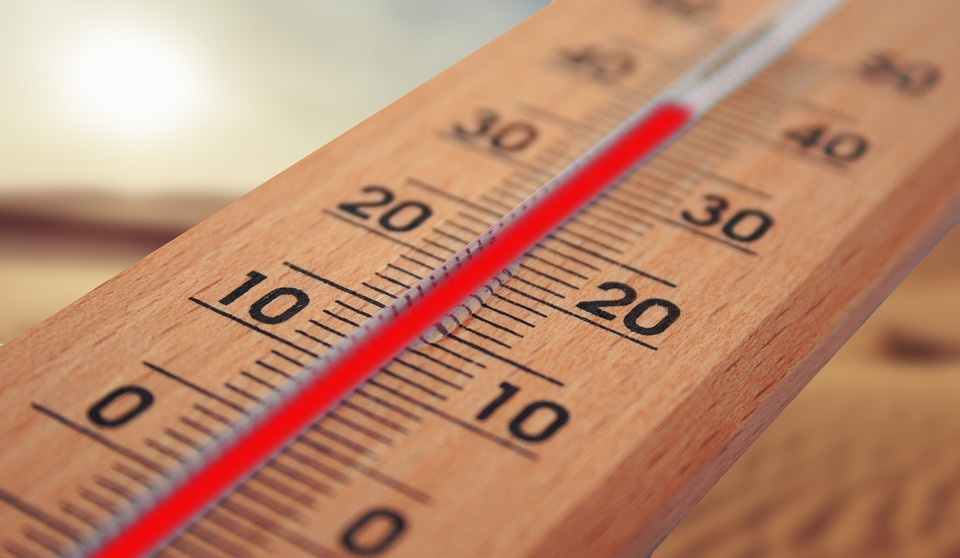

Check Here Dataset--> https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

Check Here More Details about This Project--> https://github.com/ksingh9398/Internship-Project/blob/main/second-phase-evaluation-projects--1-.pdf 

* You have to build separate models that can predict the minimum temperature for the next day
and the maximum temperature for the next day based on the details provided in the dataset.


In [1]:
# import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
# load Dataset
df=pd.read_csv('temperature.csv')

In [3]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [6]:
df.shape

(7752, 25)

In this dataset there are 25 columns and 7752 rows are present along with 2 output columns (Next_Tmax and Next_Tmin)

In [7]:
# Check Data Type
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

as we see that all data are float data type but only date column is object data type, so that it's little bit easy to work on this data

In [8]:
# Check more information about this data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [9]:
df.info

<bound method DataFrame.info of       station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.

In [10]:
# Let's Check Null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In this dataset there are many columns have null values are present, need to fill null values by mean, median and mode 

In [11]:
df.isnull().sum().sum()

1248

in this entire dataset there are 1248 rows have null values are present

<Axes: >

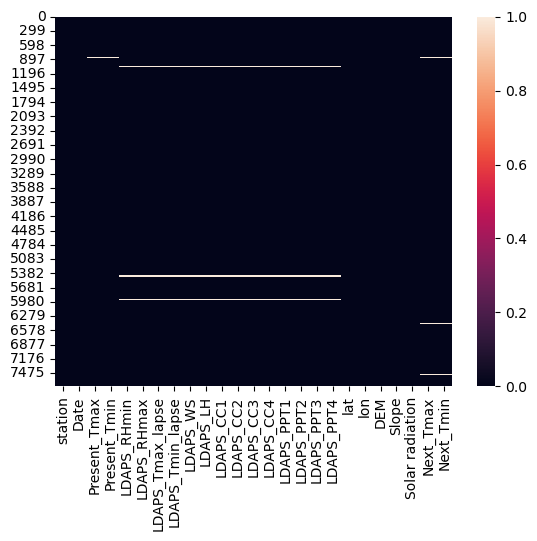

In [12]:
# let's check null values by heatmap
sns.heatmap(df.isnull())

by this heat map, we can clearly see that in some columns have null values are prsent

In [13]:
# Firstly i am droping the null data

df = df.dropna()

In [14]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

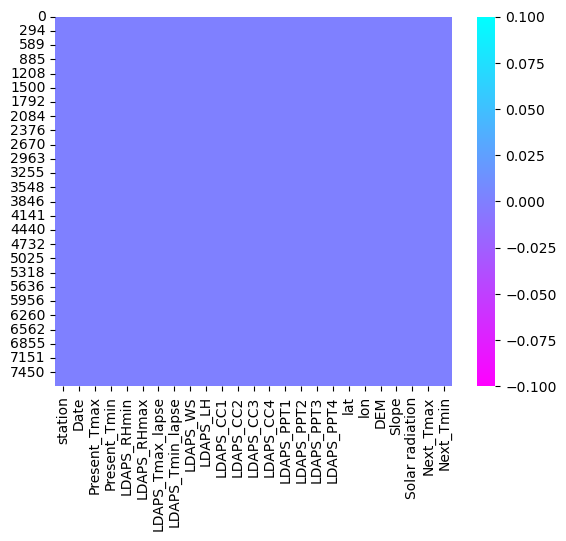

In [15]:
sns.heatmap(df.isnull(),cmap='cool_r')

In [16]:
df.shape

(7588, 25)

In [17]:
# for checking the value cont of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

station
25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: count, dtype: int64


Date
30-06-2013    25
23-07-2016    25
22-08-2015    25
23-08-2015    25
24-08-2015    25
              ..
13-08-2015    22
24-07-2015    22
06-07-2017    22
23-08-2017    22
30-06-2017    16
Name: count, Length: 307, dtype: int64


Present_Tmax
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64


Present_Tmin
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: count, Length: 155, dtype: int64


LDAPS_RHmin
77.030350    2
51.810596    2
71.658089    2
58

There are the value counts of each columns.  

In [19]:
df['Next_Tmax'].nunique()

181

In [20]:
df['Next_Tmin'].nunique()

157

In [21]:
df.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

In [22]:
df.iloc[488,:]

station                    19.0
Date                 19-07-2013
Present_Tmax               29.4
Present_Tmin               23.5
LDAPS_RHmin           65.926697
LDAPS_RHmax           82.918251
LDAPS_Tmax_lapse      29.571686
LDAPS_Tmin_lapse      25.658716
LDAPS_WS              10.119713
LDAPS_LH              29.588685
LDAPS_CC1              0.233663
LDAPS_CC2              0.452573
LDAPS_CC3              0.273511
LDAPS_CC4              0.388116
LDAPS_PPT1                  0.0
LDAPS_PPT2                  0.0
LDAPS_PPT3                  0.0
LDAPS_PPT4                  0.0
lat                     37.5776
lon                     126.938
DEM                     75.0924
Slope                    1.7678
Solar radiation     5692.742676
Next_Tmax                  30.6
Next_Tmin                  24.1
Name: 493, dtype: object

In [23]:
# Checking numberof unique values in each column
df.nunique().to_frame('No. of unique values')

No. of unique values
station                             25
Date                               307
Present_Tmax                       167
Present_Tmin                       155
LDAPS_RHmin                       7585
LDAPS_RHmax                       7577
LDAPS_Tmax_lapse                  7588
LDAPS_Tmin_lapse                  7588
LDAPS_WS                          7588
LDAPS_LH                          7588
LDAPS_CC1                         7485
LDAPS_CC2                         7496
LDAPS_CC3                         7512
LDAPS_CC4                         7438
LDAPS_PPT1                        2779
LDAPS_PPT2                        2479
LDAPS_PPT3                        2326
LDAPS_PPT4                        1892
lat                                 12
lon                                 25
DEM                                 25
Slope                               25
Solar radiation                   1575
Next_Tmax                          181
Next_Tmin                          157

# Description of Dataset

In [24]:
# Statical Summry of the dataset 
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

# Observation
This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative values

From the above description we can observe the following:

The Counts of all the columns are same which means there are no missing values in the dataset.

the median(50%) value is greater then mean in almost all columns which means the data is left skewed.

By summarizing the data we can observe in LDAPS_LH columns have huge difference between 75% and max hence there are outliers present else columns have little difference between 75% and max values. 

We can also notice the Standard deviation, min, 25% percentile valuese from this describe method.

# Data Visualization
Univariate Analysis

Present_Tmax
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64


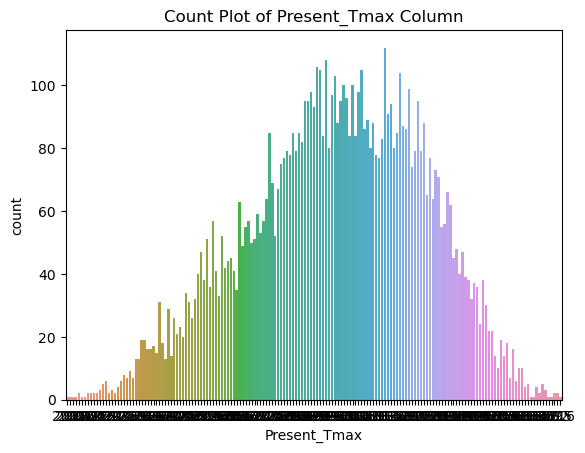

In [26]:
plt.title('Count Plot of Present_Tmax Column')
sns.countplot(x='Present_Tmax',data=df)
print(df['Present_Tmax'].value_counts())

This is normal distribution

mean value :  29.748365840801263


<Axes: xlabel='Present_Tmax', ylabel='Count'>

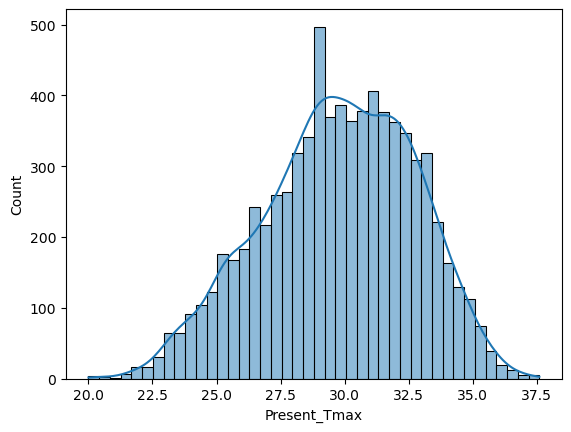

In [27]:
print('mean value : ',df['Present_Tmax'].mean())
sns.histplot(df['Present_Tmax'],kde=True)

This is Normal Distribution, by this plot we can see that all data lie between 20 to 37.5 and maximum no of count is 500.

Present_Tmin
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: count, Length: 155, dtype: int64


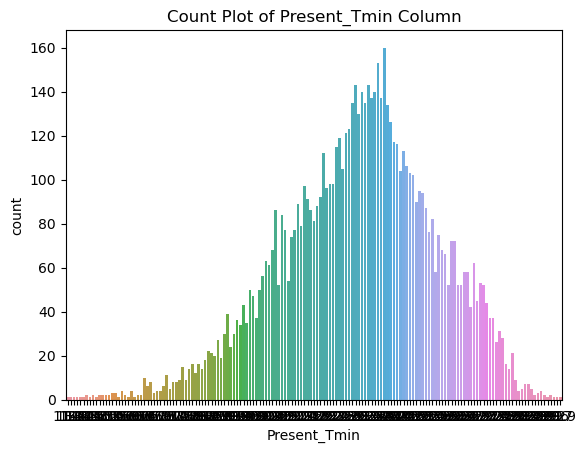

In [28]:
plt.title('Count Plot of Present_Tmin Column')
sns.countplot(x='Present_Tmin',data=df)
print(df['Present_Tmin'].value_counts())

mean value :  56.72496867696231


<Axes: xlabel='LDAPS_RHmin', ylabel='Count'>

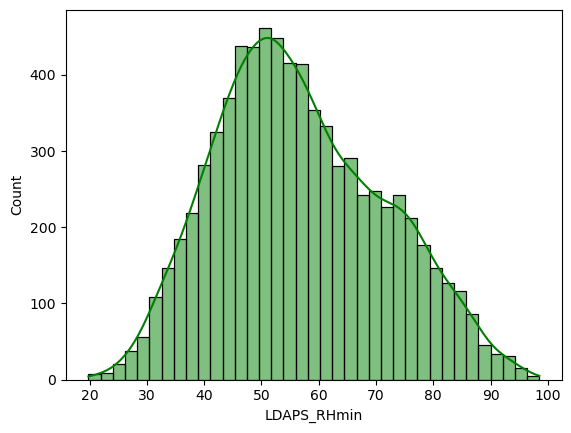

In [29]:
print('mean value : ',df['LDAPS_RHmin'].mean())
sns.histplot(df['LDAPS_RHmin'],kde=True,color='g')

mean value :  88.3608233703677


<Axes: xlabel='LDAPS_RHmax', ylabel='Count'>

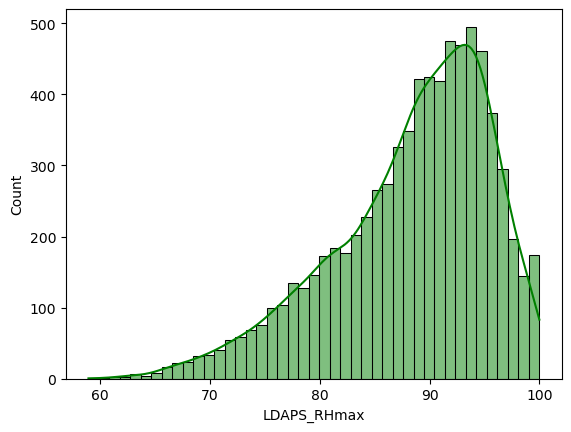

In [30]:
print('mean value : ',df['LDAPS_RHmax'].mean())
sns.histplot(df['LDAPS_RHmax'],kde=True,color='g')

mean value :  56.72496867696231


<Axes: xlabel='LDAPS_RHmin', ylabel='Count'>

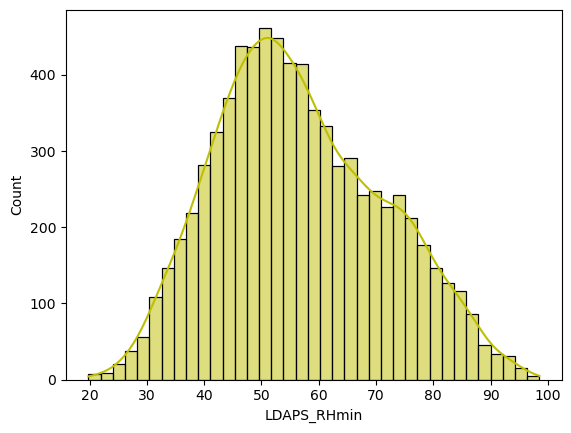

In [31]:
print('mean value : ',df['LDAPS_RHmin'].mean())
sns.histplot(df['LDAPS_RHmin'],kde=True,color='y')

mean value :  29.62012769006853


<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Count'>

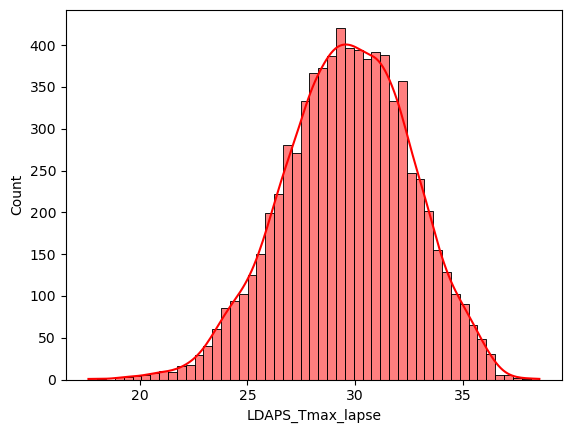

In [32]:
print('mean value : ',df['LDAPS_Tmax_lapse'].mean())
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='r')

mean value :  23.511786156327094


<Axes: xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

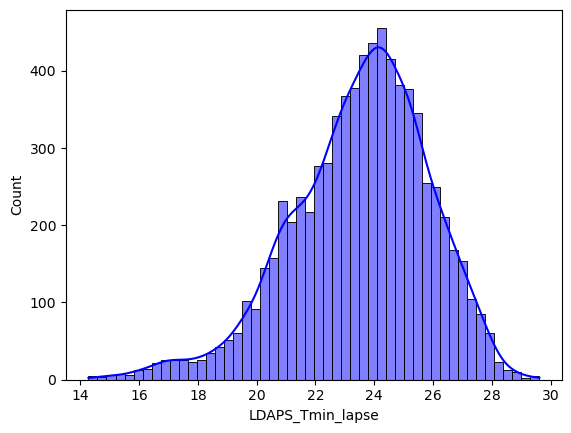

In [33]:
print('mean value : ',df['LDAPS_Tmin_lapse'].mean())
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='b')

mean value :  7.0940966991598575


<Axes: xlabel='LDAPS_WS', ylabel='Count'>

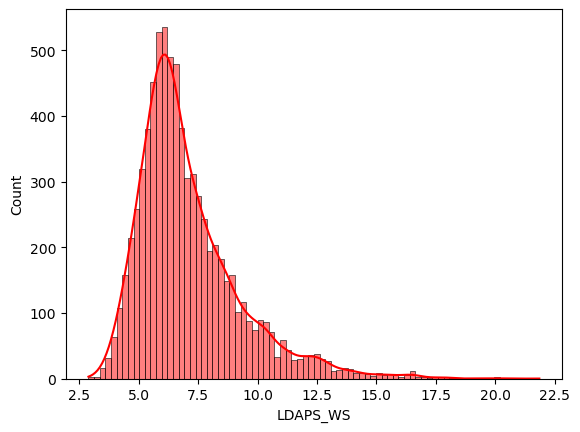

In [34]:
print('mean value : ',df['LDAPS_WS'].mean())
sns.histplot(df['LDAPS_WS'],kde=True,color='r')

mean value :  30.24152609383237


<Axes: xlabel='Next_Tmax', ylabel='Count'>

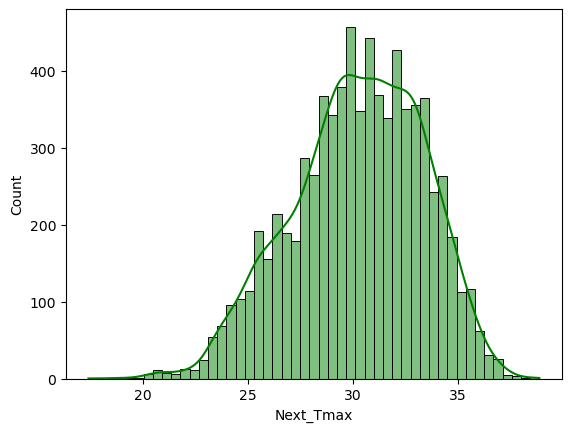

In [35]:
print('mean value : ',df['Next_Tmax'].mean())
sns.histplot(df['Next_Tmax'],kde=True,color='g')

mean value :  22.910819715340008


<Axes: xlabel='Next_Tmin', ylabel='Count'>

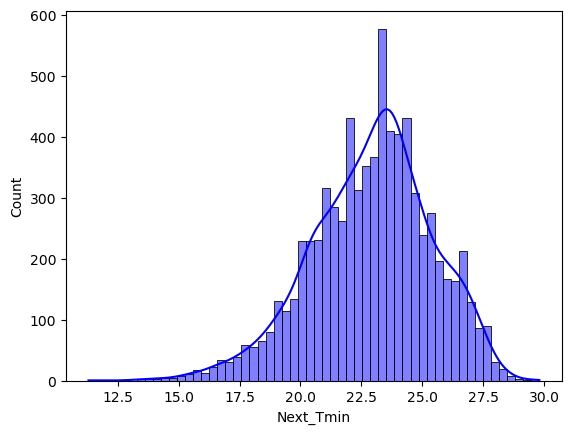

In [36]:
print('mean value : ',df['Next_Tmin'].mean())
sns.histplot(df['Next_Tmin'],kde=True,color='b')

In [37]:
df.head(1)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887  69.451805  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  Solar radiation  \
0         0.0         0.0  37.6046  126.991  212.335  2.785      5992.895996   

   Next_Tmax  Next_Tmin  
0       29.1       21.2  

[1 rows x 25 columns]

# Bivariate Analysis

<Axes: xlabel='Next_Tmax', ylabel='Present_Tmin'>

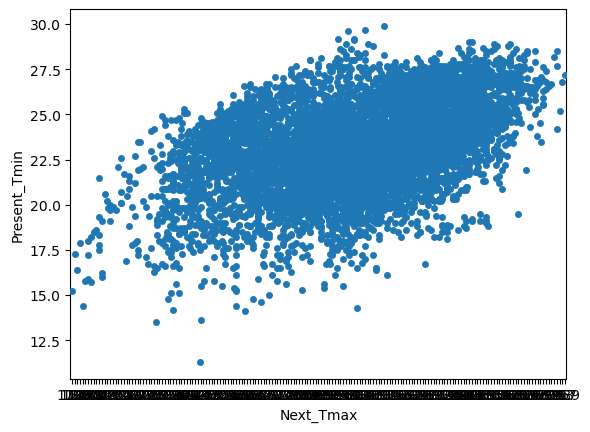

In [38]:
sns.stripplot(x='Next_Tmax',y='Present_Tmin',data=df)

<Axes: xlabel='Next_Tmin', ylabel='Present_Tmin'>

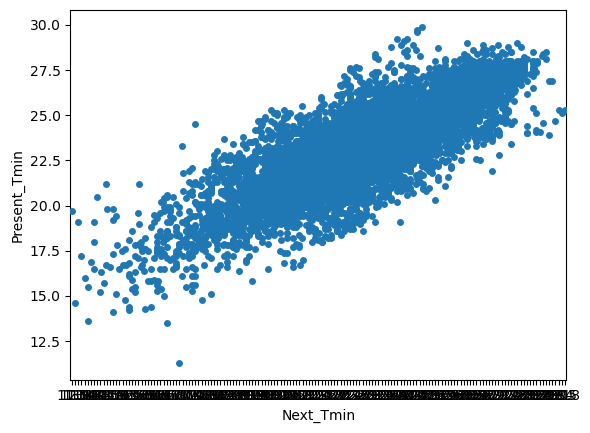

In [39]:
sns.stripplot(x='Next_Tmin',y='Present_Tmin',data=df)

<Axes: xlabel='Next_Tmax', ylabel='Present_Tmax'>

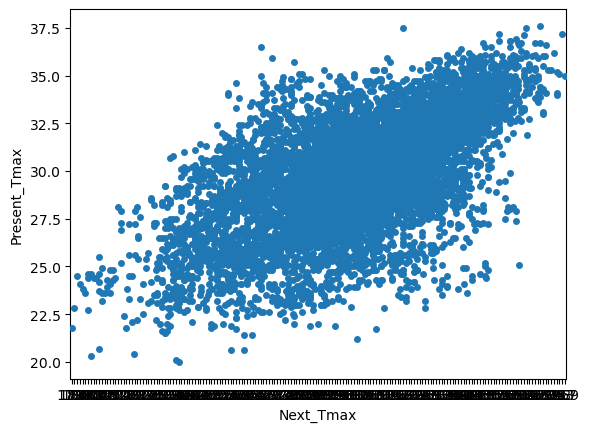

In [40]:
sns.stripplot(x='Next_Tmax',y='Present_Tmax',data=df)

<Axes: xlabel='Next_Tmin', ylabel='Present_Tmax'>

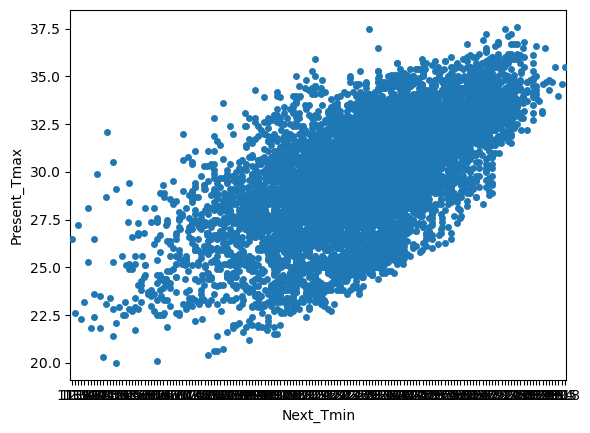

In [41]:
sns.stripplot(x='Next_Tmin',y='Present_Tmax',data=df)

<Axes: xlabel='Next_Tmax', ylabel='Next_Tmin'>

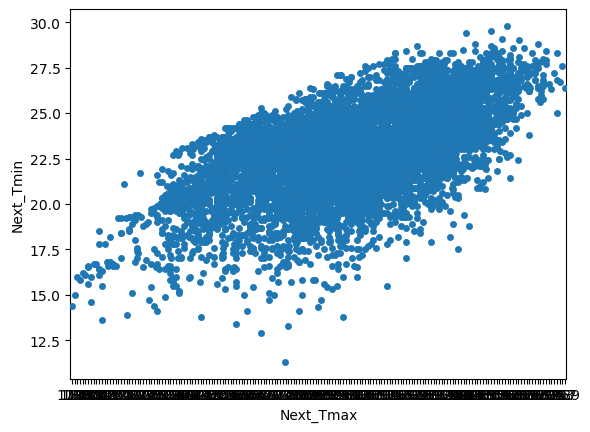

In [42]:
sns.stripplot(x='Next_Tmax',y='Next_Tmin',data=df)

In [43]:
df.head(1)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887  69.451805  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  Solar radiation  \
0         0.0         0.0  37.6046  126.991  212.335  2.785      5992.895996   

   Next_Tmax  Next_Tmin  
0       29.1       21.2  

[1 rows x 25 columns]

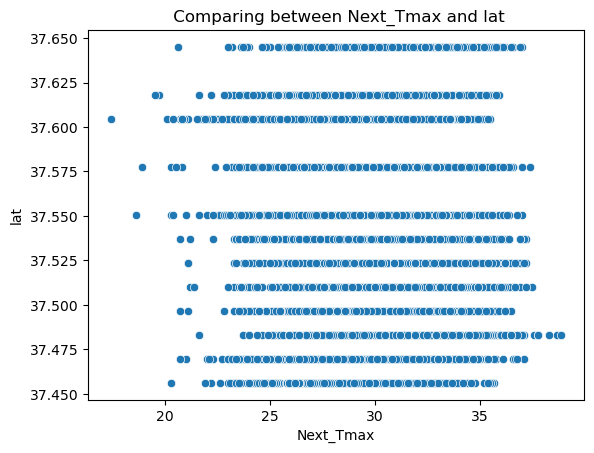

In [44]:
plt.title(" Comparing between Next_Tmax and lat")
sns.scatterplot(x='Next_Tmax',y='lat',data=df, palette='bright')
plt.show()

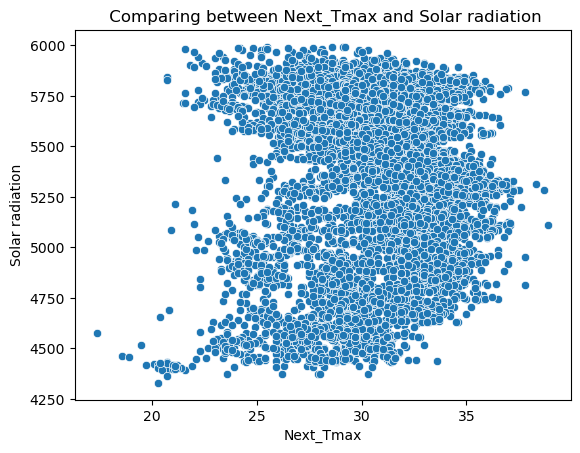

In [45]:
plt.title(" Comparing between Next_Tmax and Solar radiation")
sns.scatterplot(x='Next_Tmax',y='Solar radiation',data=df, palette='bright')
plt.show()

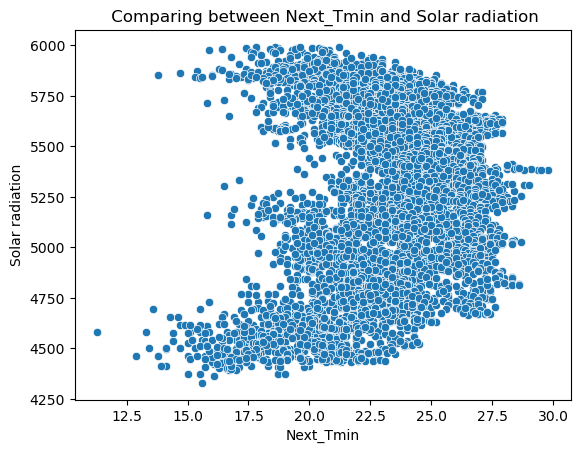

In [46]:
plt.title(" Comparing between Next_Tmin and Solar radiation")
sns.scatterplot(x='Next_Tmin',y='Solar radiation',data=df, palette='bright')
plt.show()

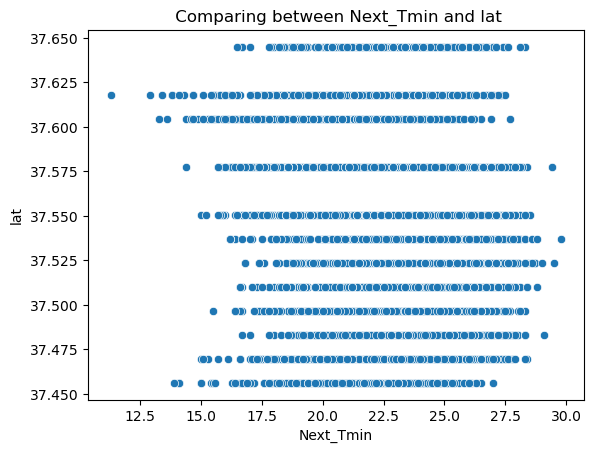

In [47]:
plt.title(" Comparing between Next_Tmin and lat")
sns.scatterplot(x='Next_Tmin',y='lat',data=df, palette='bright')
plt.show()

<Axes: xlabel='Next_Tmax', ylabel='lat'>

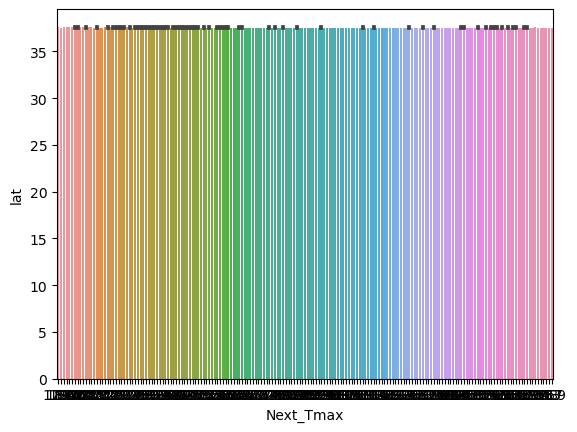

In [48]:
sns.barplot(x='Next_Tmax', y='lat',data=df)

<Axes: xlabel='Date', ylabel='Next_Tmax'>

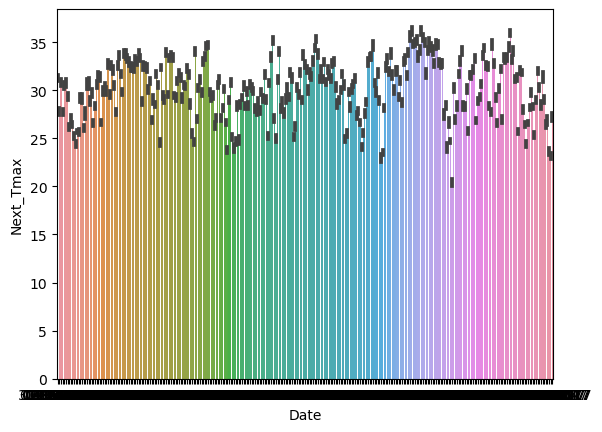

In [49]:
sns.barplot(x='Date',y='Next_Tmax',data=df)

# Multivariate Analysis

In [50]:
fig = px.density_mapbox(df, lat='lat', lon='lon', z='Present_Tmax', hover_data=['LDAPS_RHmin', 'LDAPS_RHmax'],
                        
                        mapbox_style="stamen-terrain", template = 'plotly_dark', title = 'Maximum Temperature on Lat Long')
fig.show()

In [51]:
# Remove the Date column
df.drop(['Date'], axis = 1,inplace=True)

In [52]:
df.tail(1)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
7749         27.939516         18.522965  7.289264  9.090034   0.048954  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat     lon      DEM   Slope  \
7749         0.0         0.0         0.0  37.5237  126.97  19.5844  0.2713   

      Solar radiation  Next_Tmax  Next_Tmin  
7749      4451.345215       27.8       17.4  

[1 rows x 24 columns]

there are some columns have outliers, i will remove the outlers 

# Check Skewness

In [53]:
df.skew

<bound method DataFrame.skew of       station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.0069

There are no skewness are present 

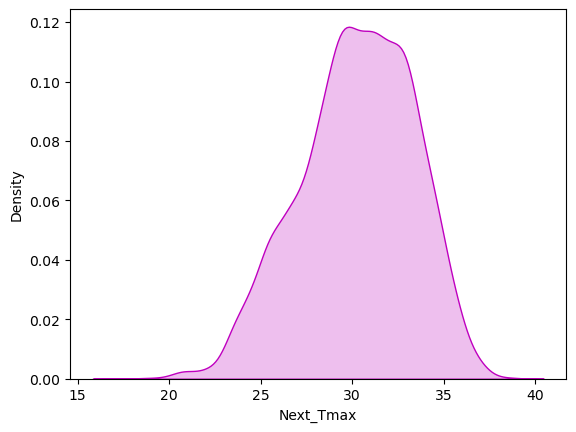

In [54]:
# Lets visulize how the data has been distributed in Next_Tmax column
sns.distplot(df['Next_Tmax'],color='m',kde_kws={'shade':True},hist=False)
plt.show()

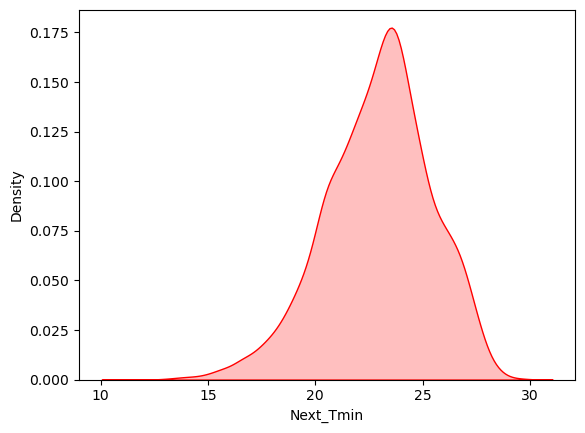

In [55]:
# Lets visulize how the data has been distributed in Next_Tmin column
sns.distplot(df['Next_Tmin'],color='r',kde_kws={'shade':True},hist=False)
plt.show()

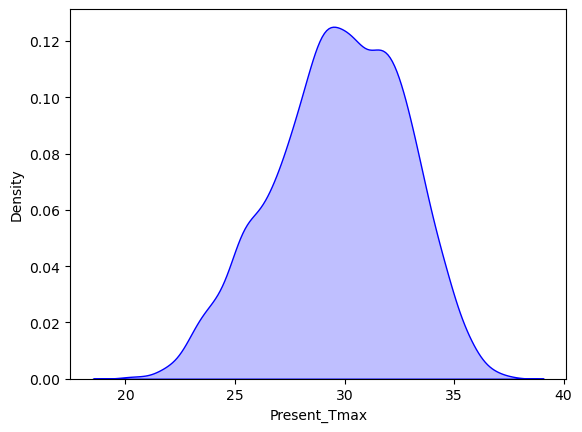

In [56]:
# Lets visulize how the data has been distributed in Present_Tmax column
sns.distplot(df['Present_Tmax'],color='b',kde_kws={'shade':True},hist=False)
plt.show()

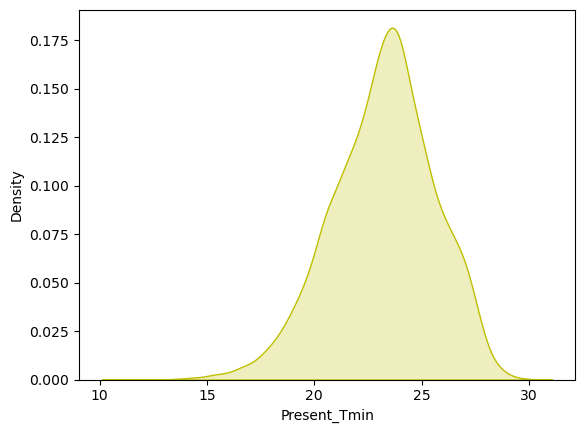

In [57]:
# Lets visulize how the data has been distributed in Present_Tmin column
sns.distplot(df['Present_Tmin'],color='y',kde_kws={'shade':True},hist=False)
plt.show()

In [58]:
# Checking the correlation between features and the target.
cor=df.corr()
cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.132129   0.006539  ...   -0.007635   -0.013865   
Present_Tmax      0.134246  -0.316333  ...   -0.104779   -0.127248   
Present_Tmin     -0.012817   0.084348  ...    0.066207   

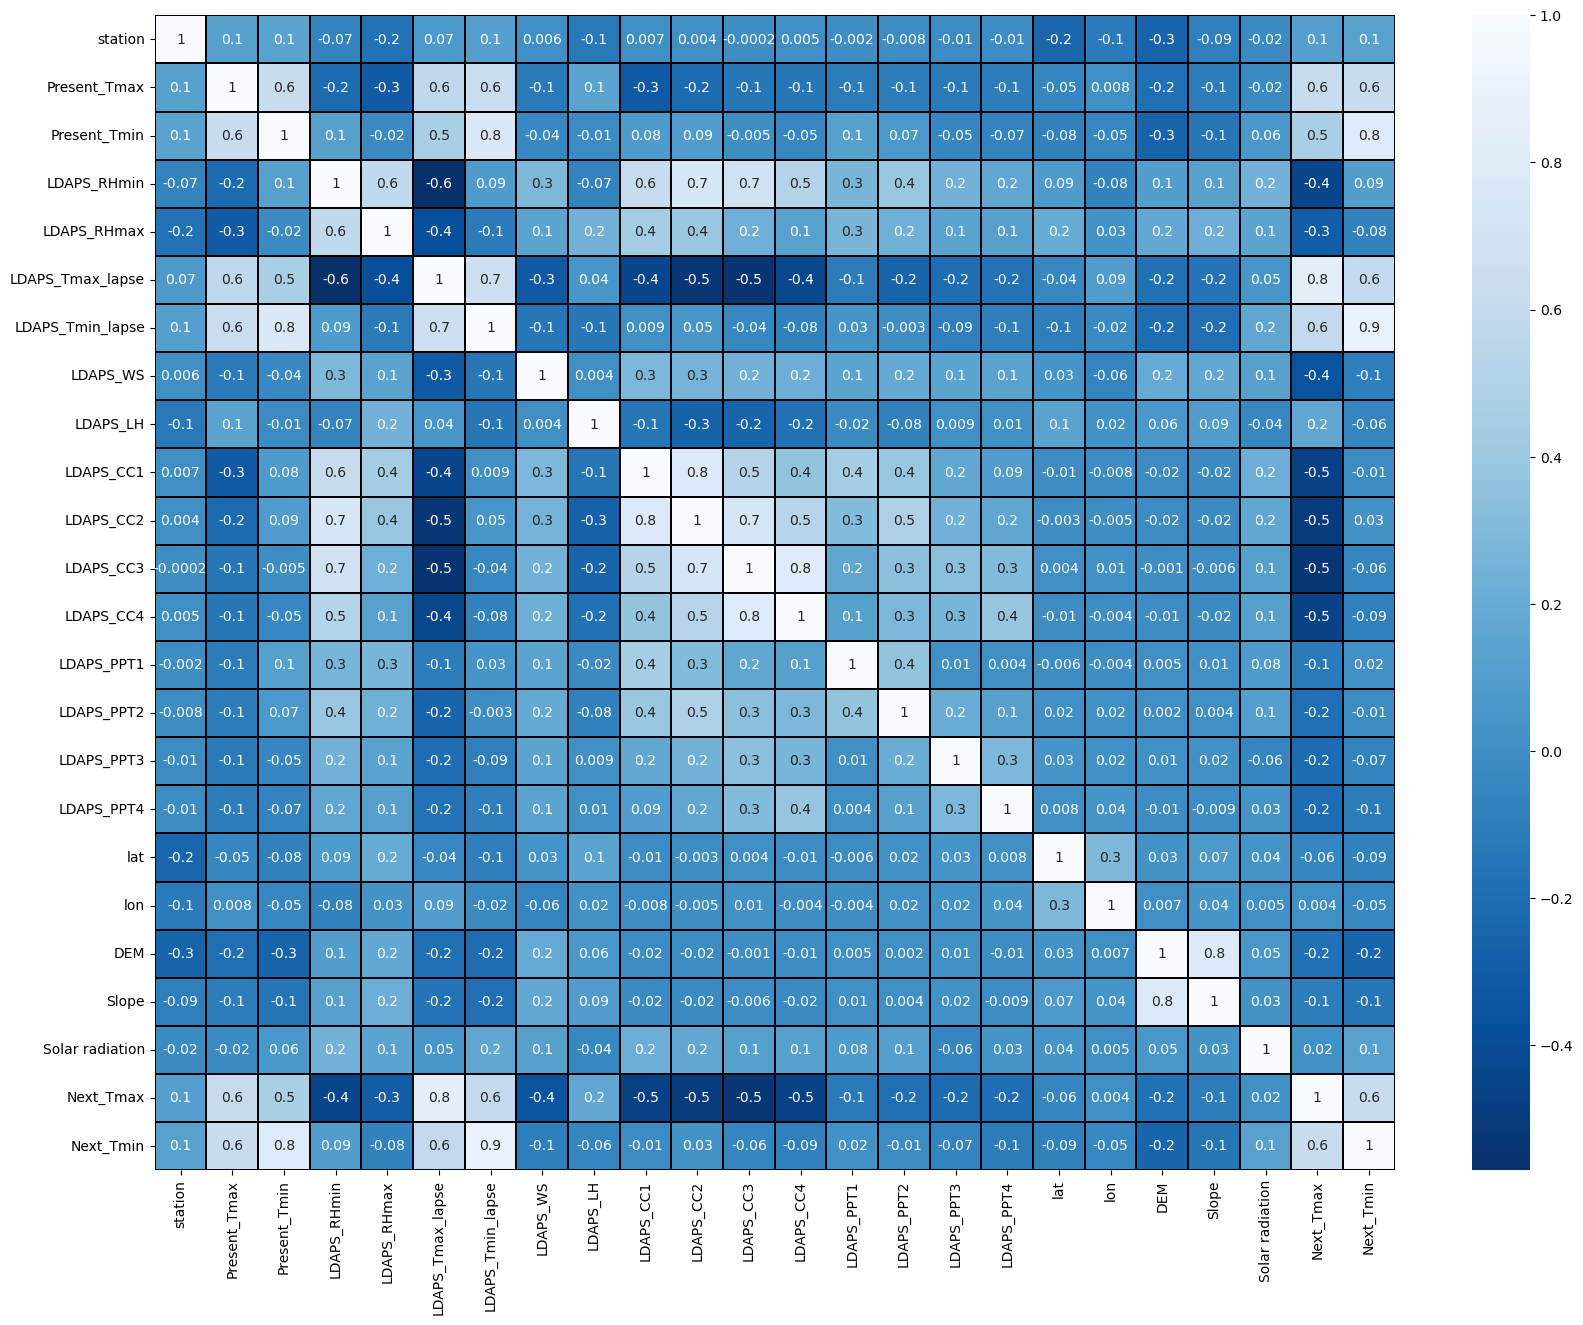

In [59]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',cmap='Blues_r',annot=True)
plt.yticks(rotation=0);
plt.show()

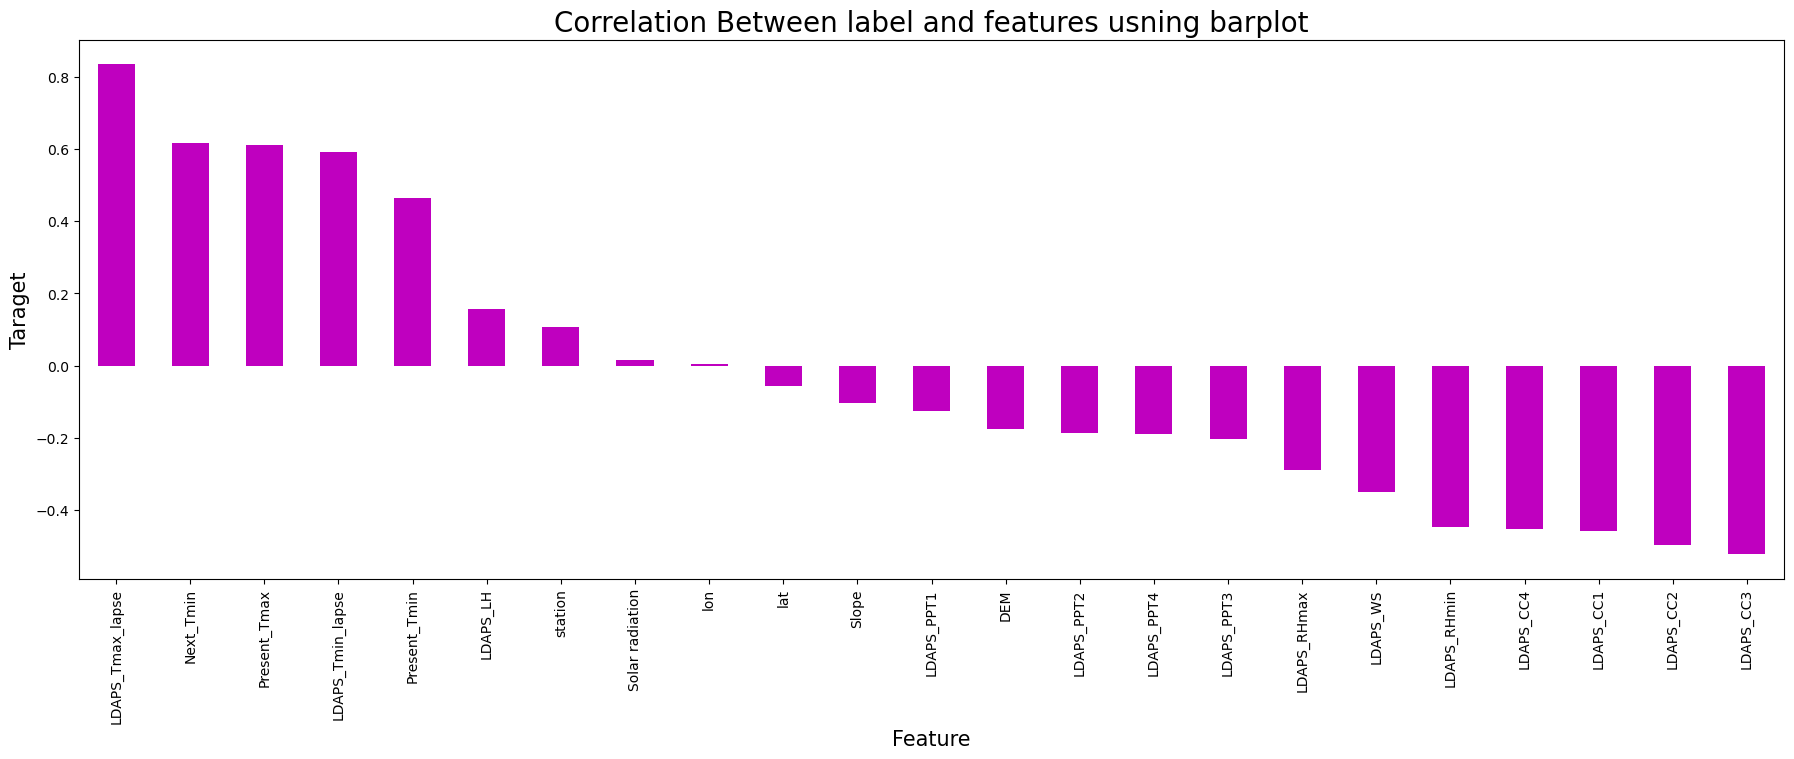

In [60]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Taraget', fontsize=15)
plt.title('Correlation Between label and features usning barplot',fontsize=20)
plt.show()

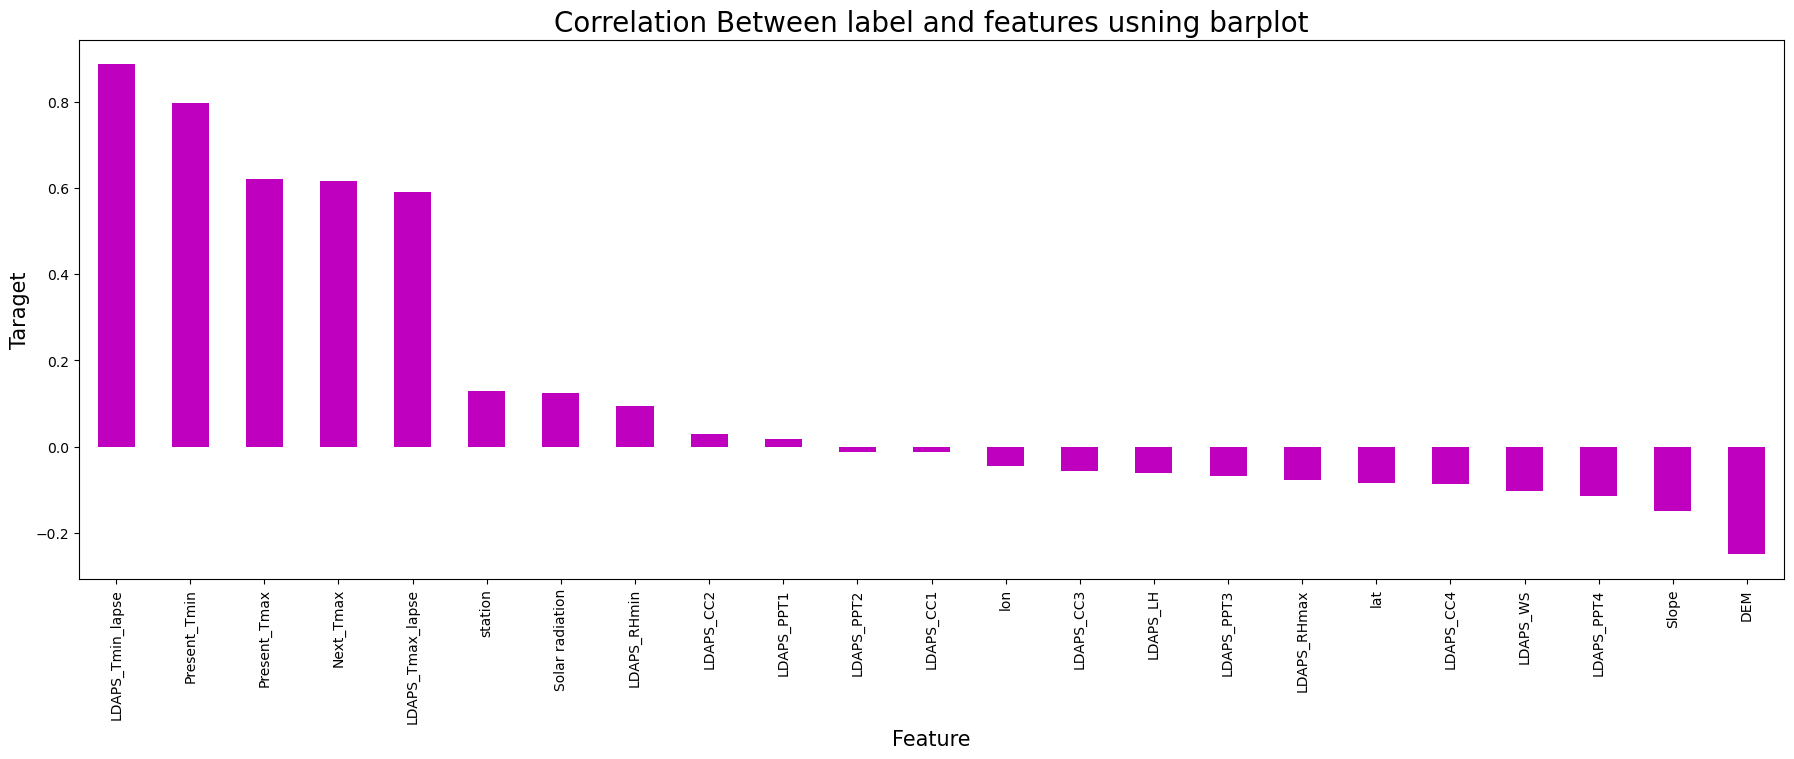

In [61]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Taraget', fontsize=15)
plt.title('Correlation Between label and features usning barplot',fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. 

# Separating Features and lable

# Firstly Check for Next_Tmax

In [62]:
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y = df['Next_Tmax']
z = df['Next_Tmin']

In [63]:
print(x.head())
print('=======================================================')
print(y.head())
print('........................................................')
print(z.head())

   station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

   LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
0   0.130928         0.0         0.0       

We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

# Modelling 

# Findint the Best random state

In [64]:
# importing necessary libraies:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30)

In [66]:
# Impoet Library 
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [67]:
# Linear Regression
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_train)
pred_train=LR.predict(x_train)
print('R2_score on training Data: ', r2_score(y_train,pred_train)*100)

R2_score on training Data:  78.6189011590729


In [68]:
# KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_knn))
print('R2_score on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score:  0.5309815513408819
R2_score on training Data:  70.27429503492637
Mean Absolute Error:  1.6410979358805444
Mean Squared Error:  4.479399033816425
Root Mean Squared Error:  2.1164590791736146


In [69]:
# SVR
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score: ', r2_score(y_test,pred_SVR))
print('R2_score on training DATA : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error : ', mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2_score:  0.05616752191165619
R2_score on training DATA :  5.575937507960427
Mean Absolute Error :  2.4462804787783634
Mean Squared Error :  9.01414923553732
Root Mean Squared Error :  3.0023572797948814


In [70]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)

print('R2_score : ', r2_score(y_test,pred_DTR))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error : ', mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score :  0.743719437845979
R2_score on training Data :  100.0
Mean Absolute Error :  1.1266139657444003
Mean Squared Error :  2.447628458498024
Root Mean Squared Error :  1.5644898396915283


# Linear Regression is the best modle for Next_Tmax 

# Now Check Next_Tmin 

In [71]:
x_train,x_test,z_train,z_test=train_test_split(x,z, test_size=0.30)

In [72]:
# Linear Regression
LR=LinearRegression()
LR.fit(x_train,z_train)
pred_LR=LR.predict(x_train)
pred_train=LR.predict(x_train)
print('R2_score on training Data: ', r2_score(z_train,pred_train)*100)

R2_score on training Data:  83.51801192356947


In [73]:
# KNN
knn=KNN()
knn.fit(x_train,z_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score: ',r2_score(z_test,pred_knn))
print('R2_score on training Data: ', r2_score(z_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(z_test,pred_knn))
print('Mean Squared Error: ', mean_squared_error(z_test,pred_knn))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(z_test,pred_knn)))

R2_score:  0.5001738469822528
R2_score on training Data:  68.78616601741727
Mean Absolute Error:  1.3260254721124287
Mean Squared Error:  2.918601317523057
Root Mean Squared Error:  1.708391441538811


In [74]:
# SVR
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,z_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score: ', r2_score(z_test,pred_SVR))
print('R2_score on training DATA : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error : ', mean_absolute_error(z_test,pred_SVR))
print('Mean Squared Error : ', mean_squared_error(z_test,pred_SVR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(z_test,pred_SVR)))

R2_score:  0.13250690153299172
R2_score on training DATA :  -529.9326816062987
Mean Absolute Error :  1.7869743382552319
Mean Squared Error :  5.0654942420311295
Root Mean Squared Error :  2.2506652887604433


In [75]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,z_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)

print('R2_score : ', r2_score(z_test,pred_DTR))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error : ', mean_absolute_error(z_test,pred_DTR))
print('Mean Squared Error : ', mean_squared_error(z_test,pred_DTR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(z_test,pred_DTR)))

R2_score :  0.7723048147052546
R2_score on training Data :  -614.2991825856378
Mean Absolute Error :  0.8446201141853317
Mean Squared Error :  1.3295652173913044
Root Mean Squared Error :  1.1530677418917348


# Linear Regression is the best module for Next_Tmin

                                                                                Thanks
*                                                                             Navin Singh